In [60]:
from keras.applications.vgg16 import VGG16
#Load the model
model = VGG16()

In [61]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

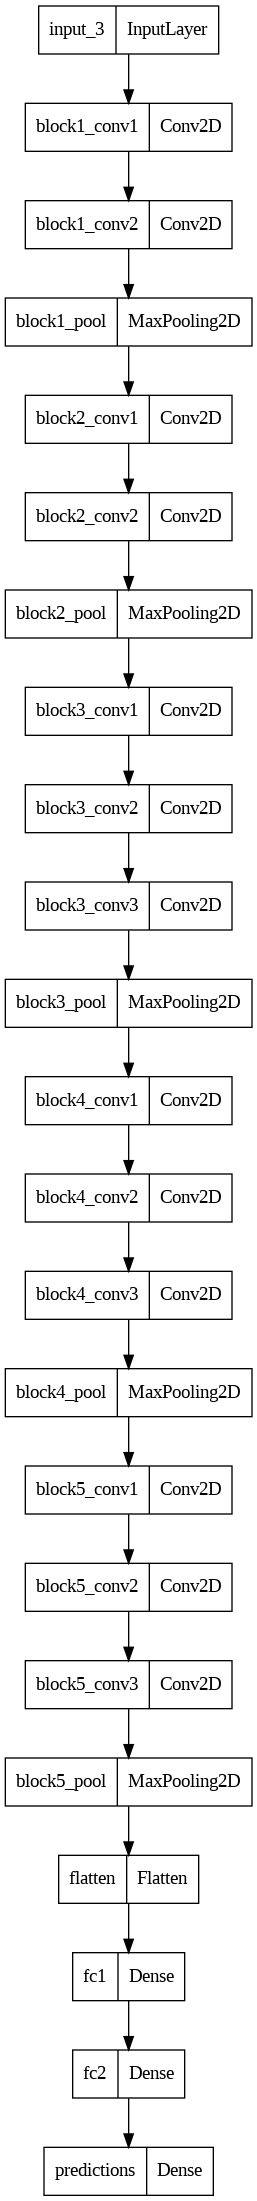

In [62]:
from keras.utils import plot_model

plot_model(model)

In [63]:
for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv' not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [20]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[1].get_weights()

In [24]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()     #it will give max n min of whole 4d array 3x3x3x64
filters = (filters - f_min) / (f_max - f_min)

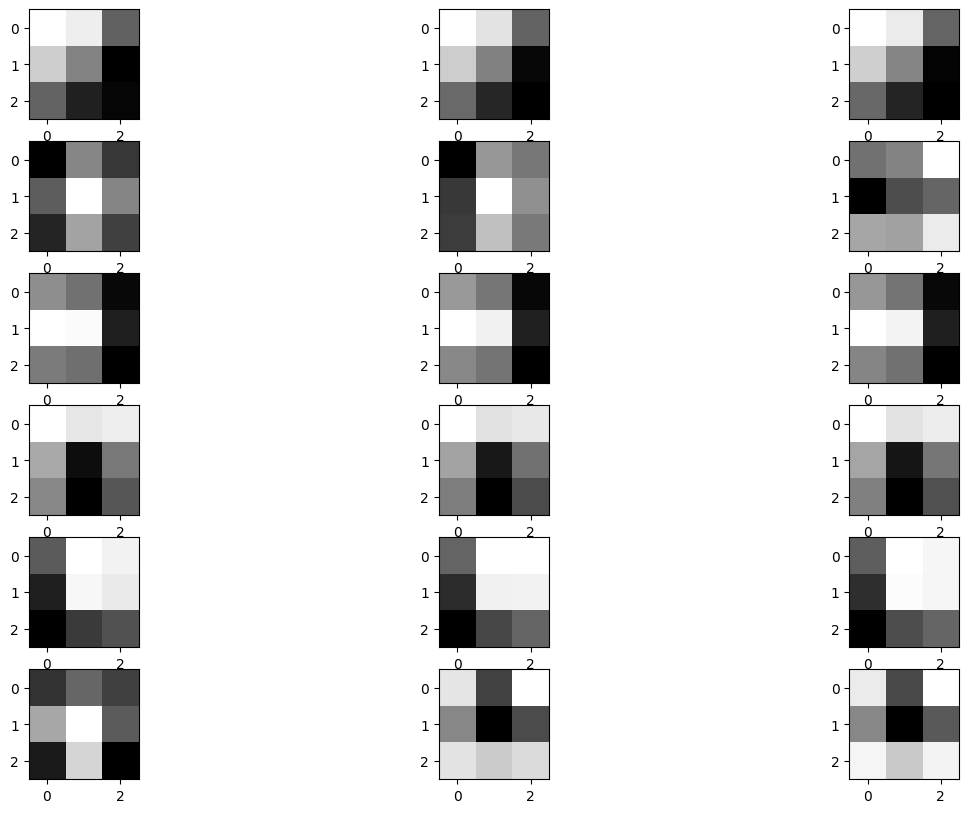

In [25]:
from matplotlib import pyplot
n_filters =6
ix=1
fig = pyplot.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
pyplot.show()

In [26]:
#now we will take an image and convolve that with these filters to see what cnn is seeing

In [28]:
import tensorflow as tf
model = tf.keras.Model(inputs=model.inputs , outputs=model.layers[1].output) #now we create a model that is subset of vgg model
#we take layer 1st input as vgg input and output as vgg layer 1 outputs

In [72]:
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
img = image.load_img("/content/pexels-peng-louis-1643457.jpg" , target_size=(224,224))

# convert the image to an array
img = image.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)

img = preprocess_input(img)

1/1 [==============================] - 7s 7s/step


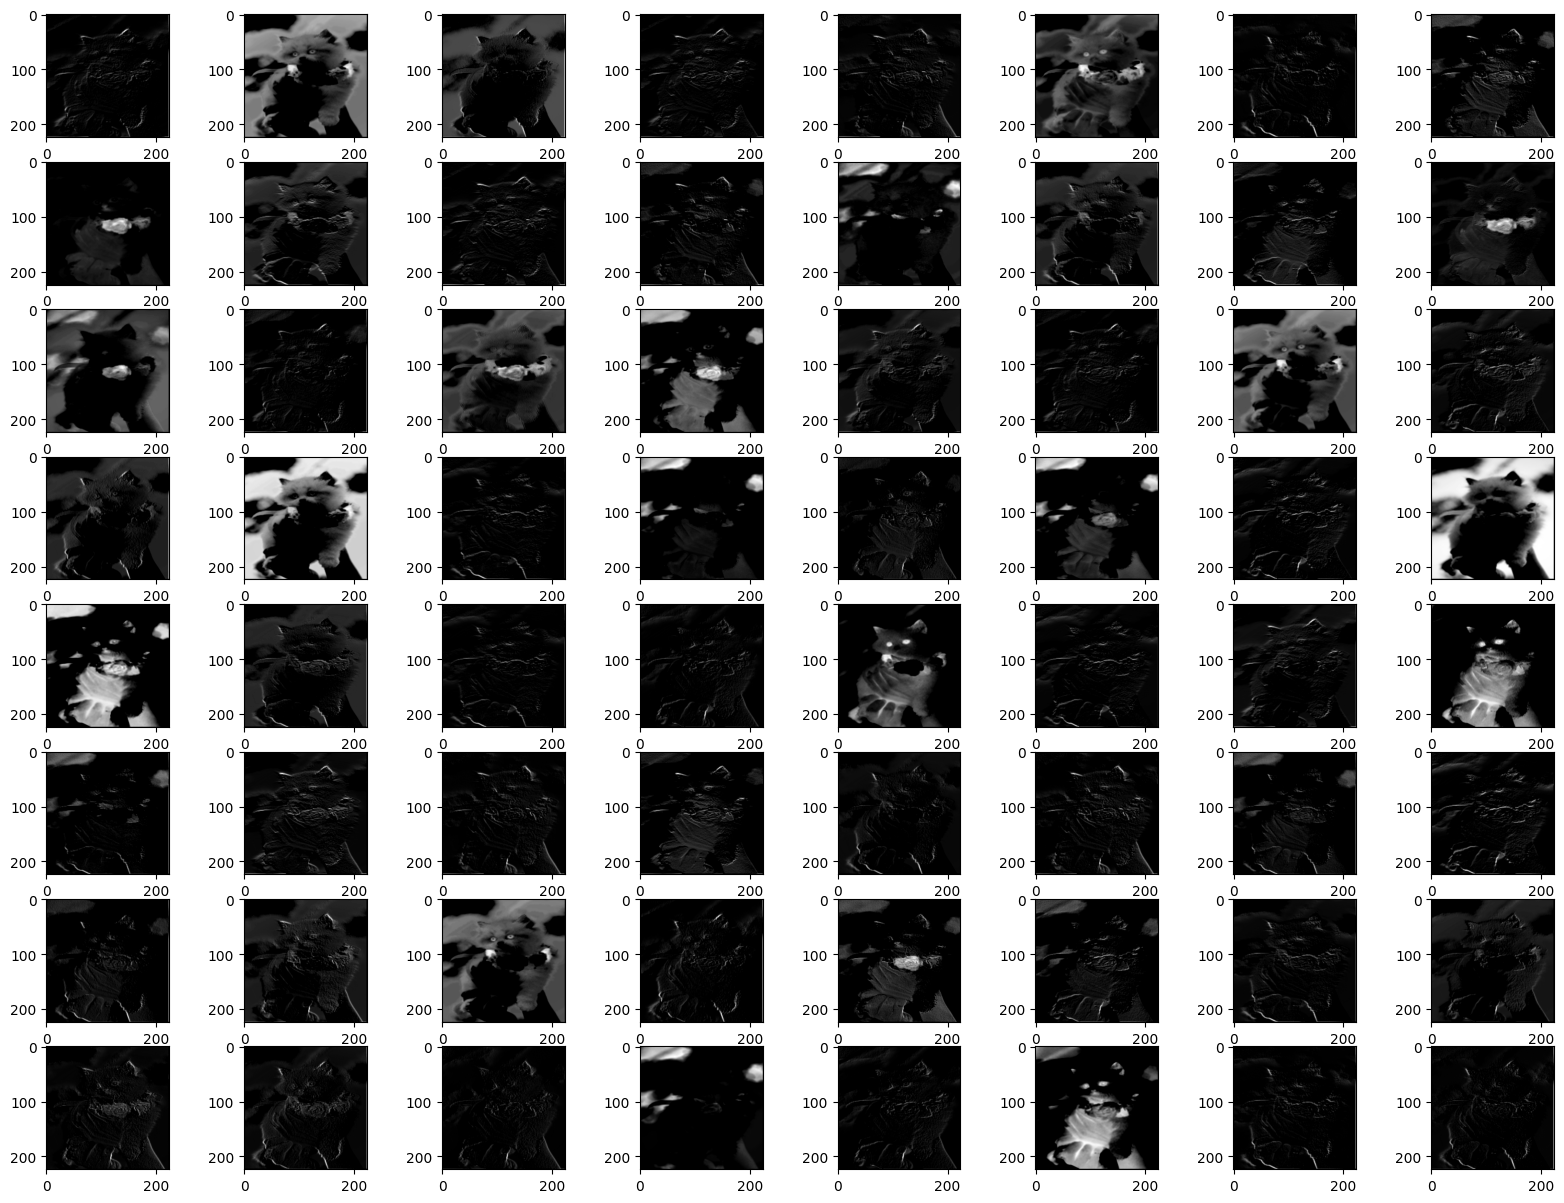

In [35]:
#calculating features_map
features = model.predict(img)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')

pyplot.show()

In [43]:
#features[0,:,:,0]

In [44]:
model2 = VGG16()

In [56]:
layer_index = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = tf.keras.Model( inputs= model2.inputs, outputs = outputs) #here we are having 1 input layer and that to 5 different
#output layers and give 5 results

1/1 [==============================] - 0s 138ms/step


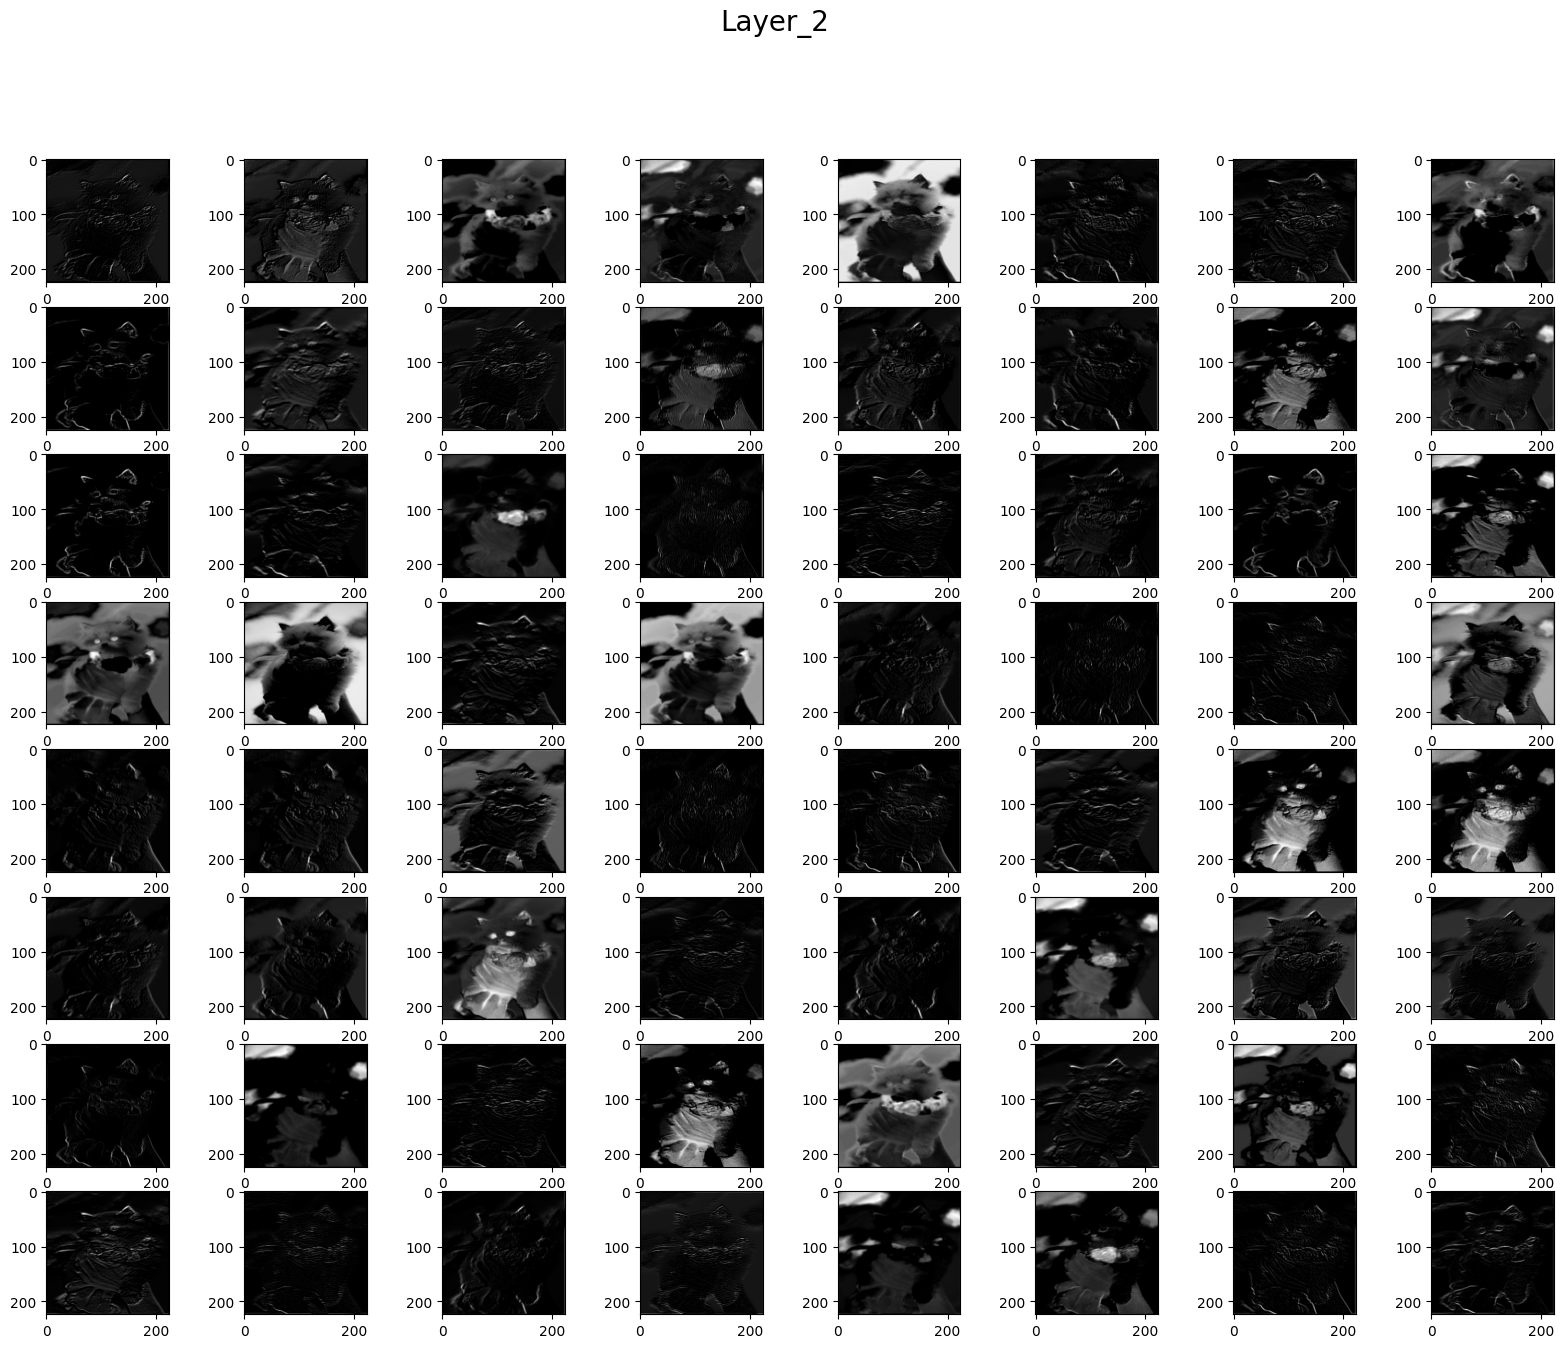

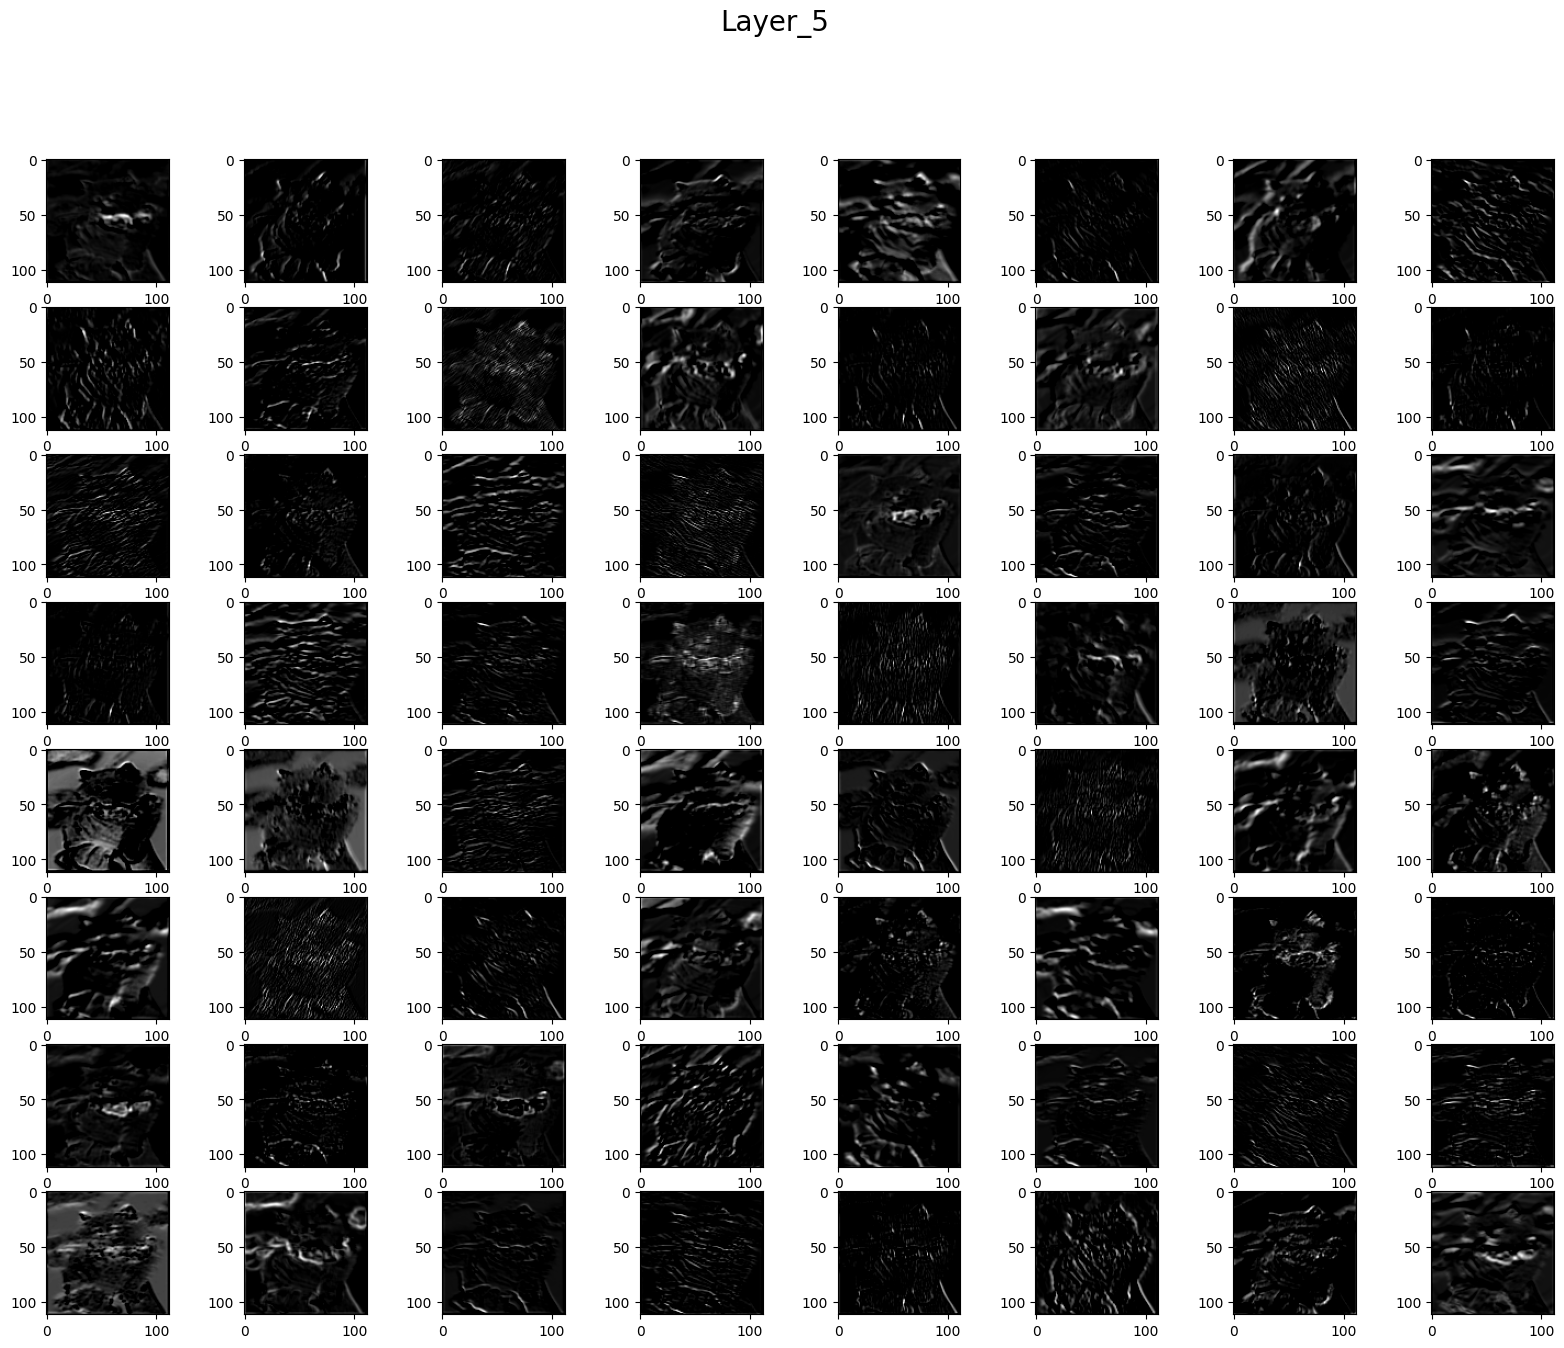

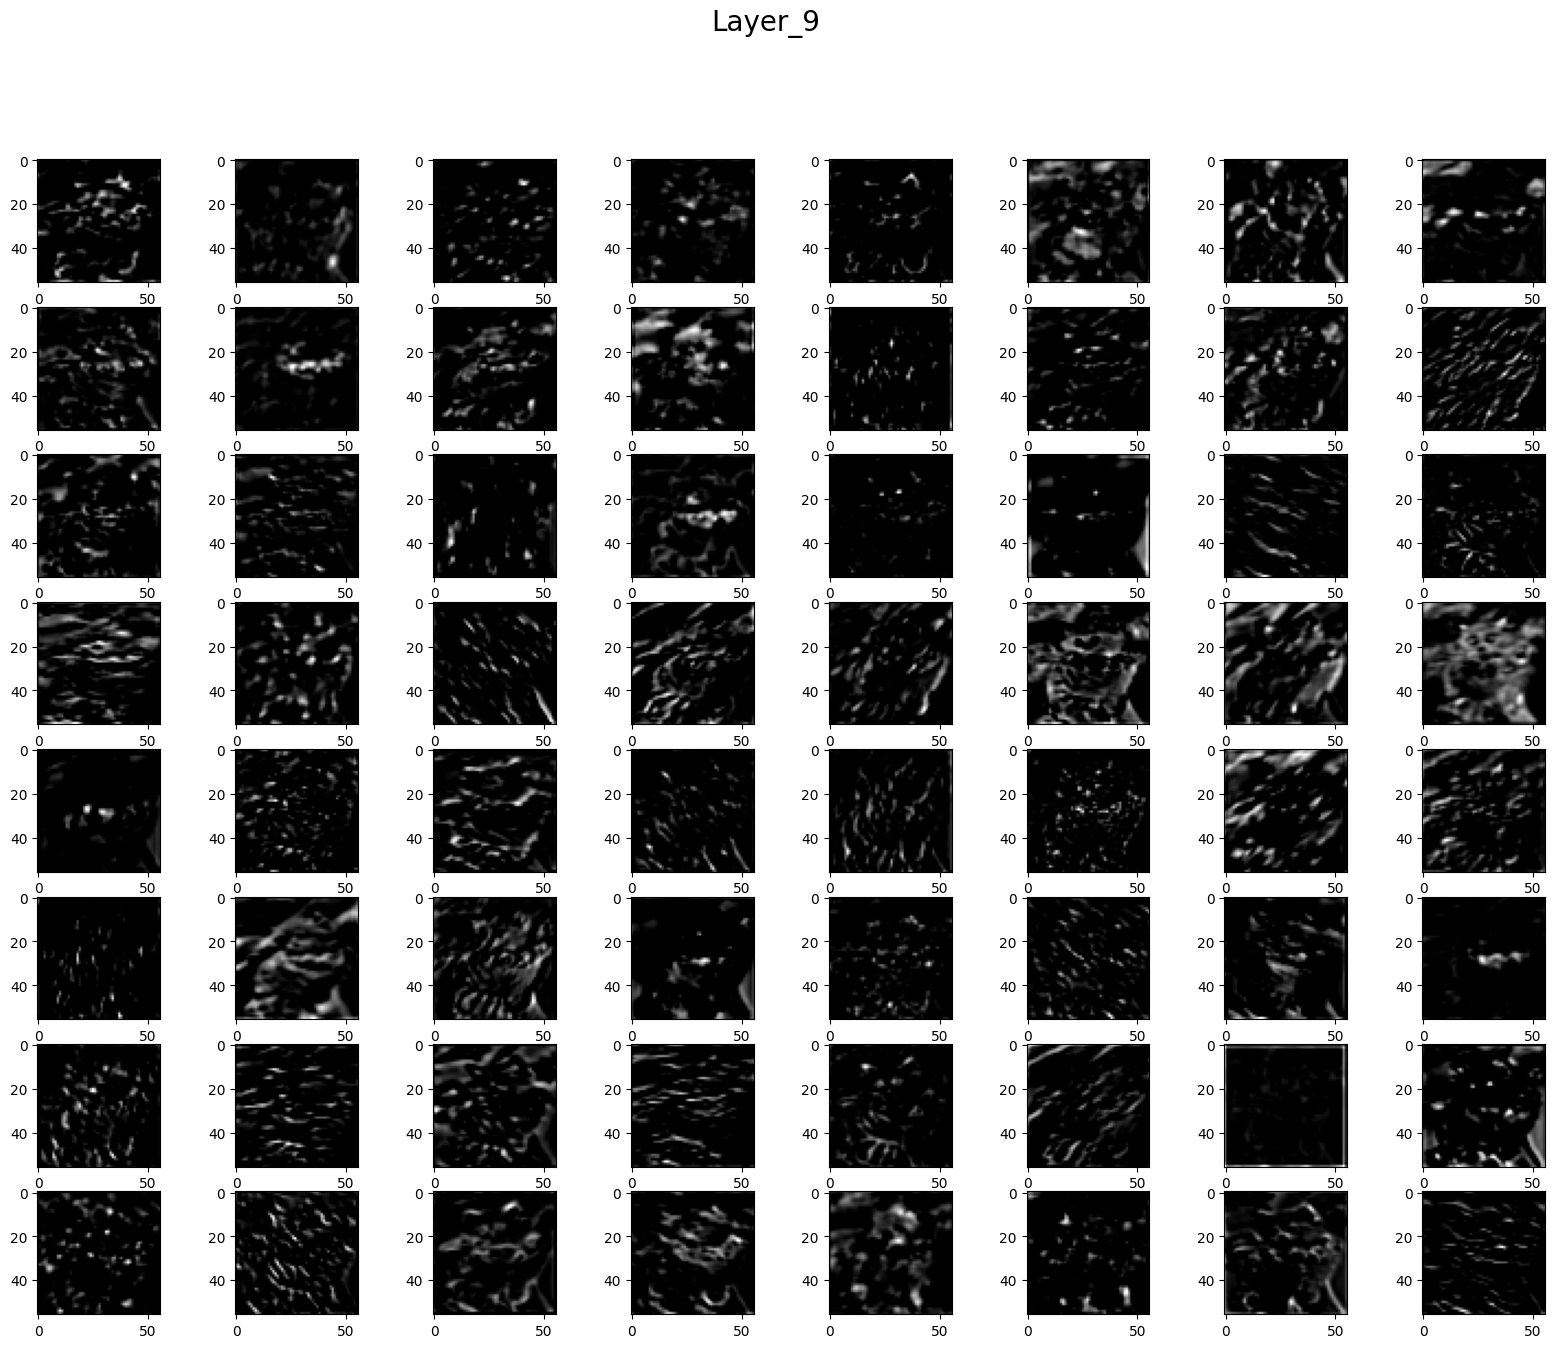

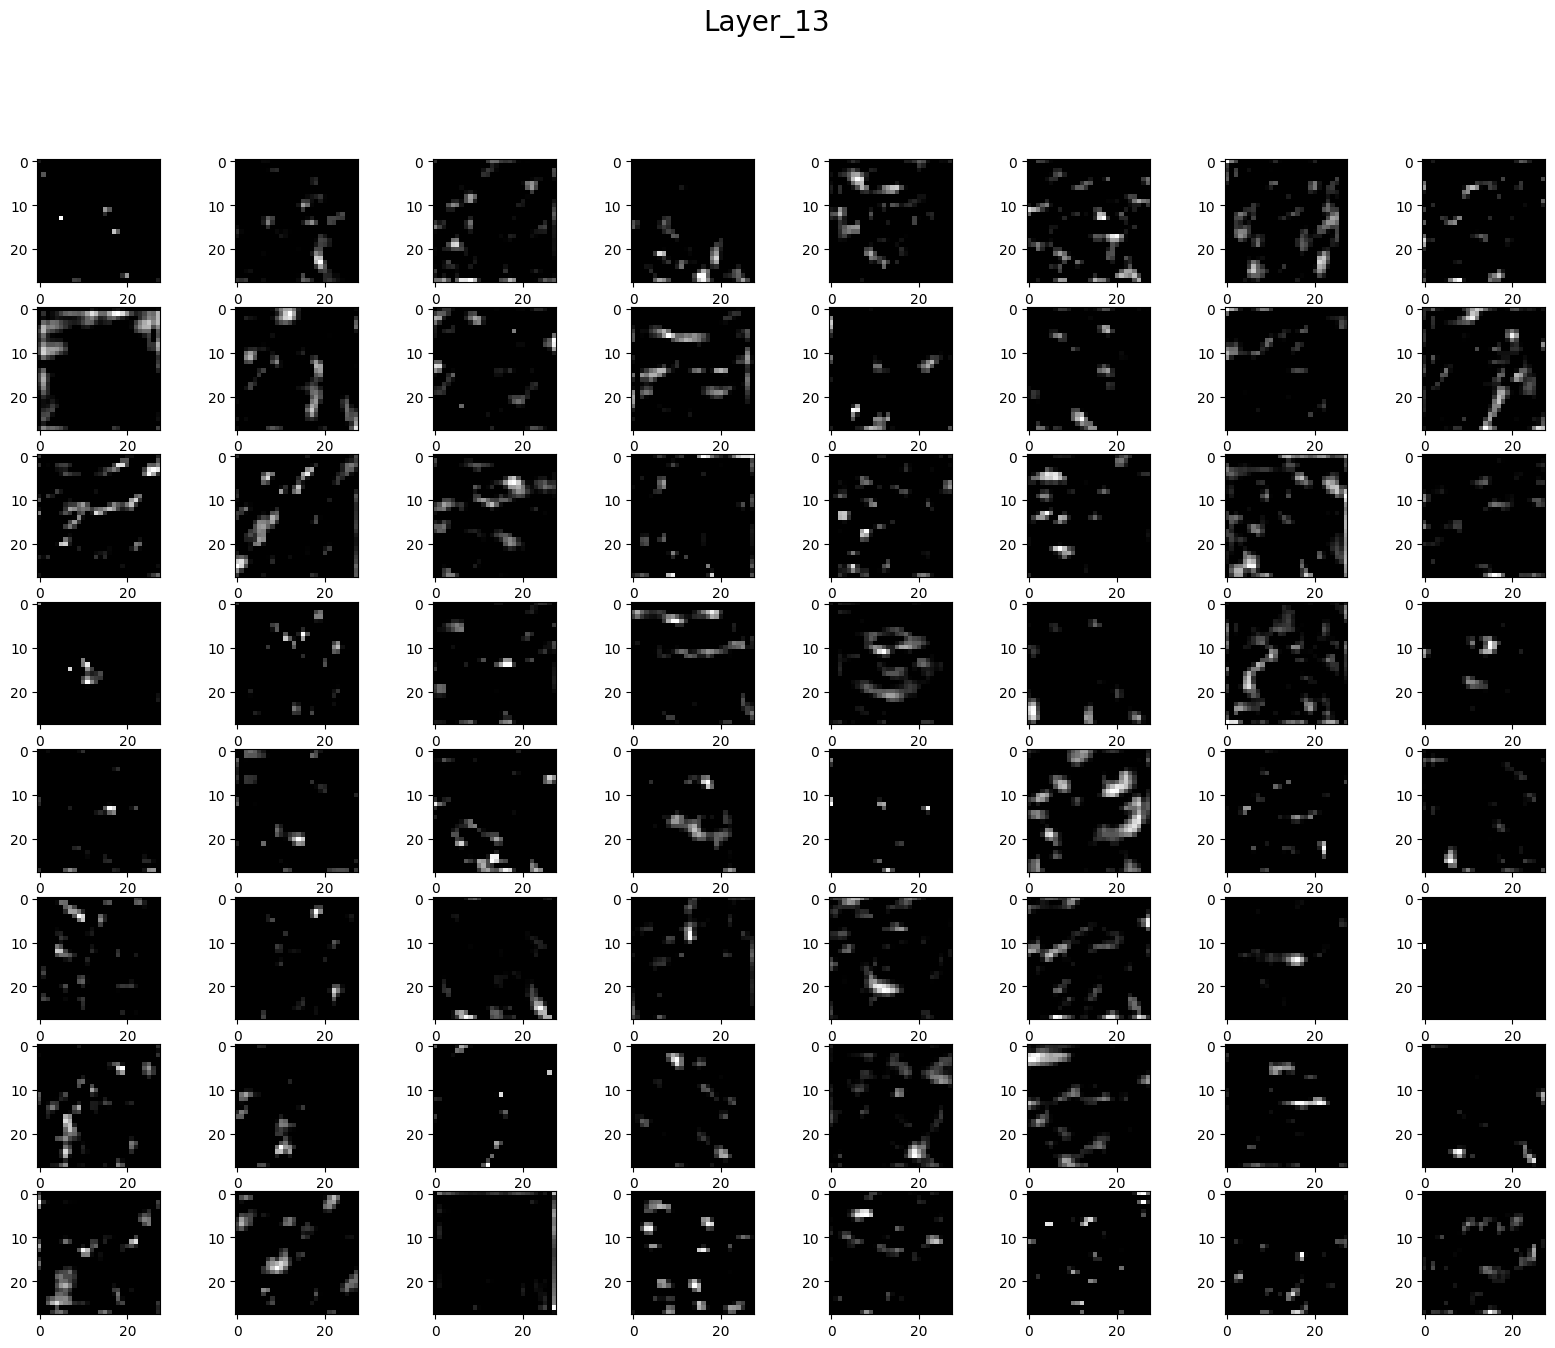

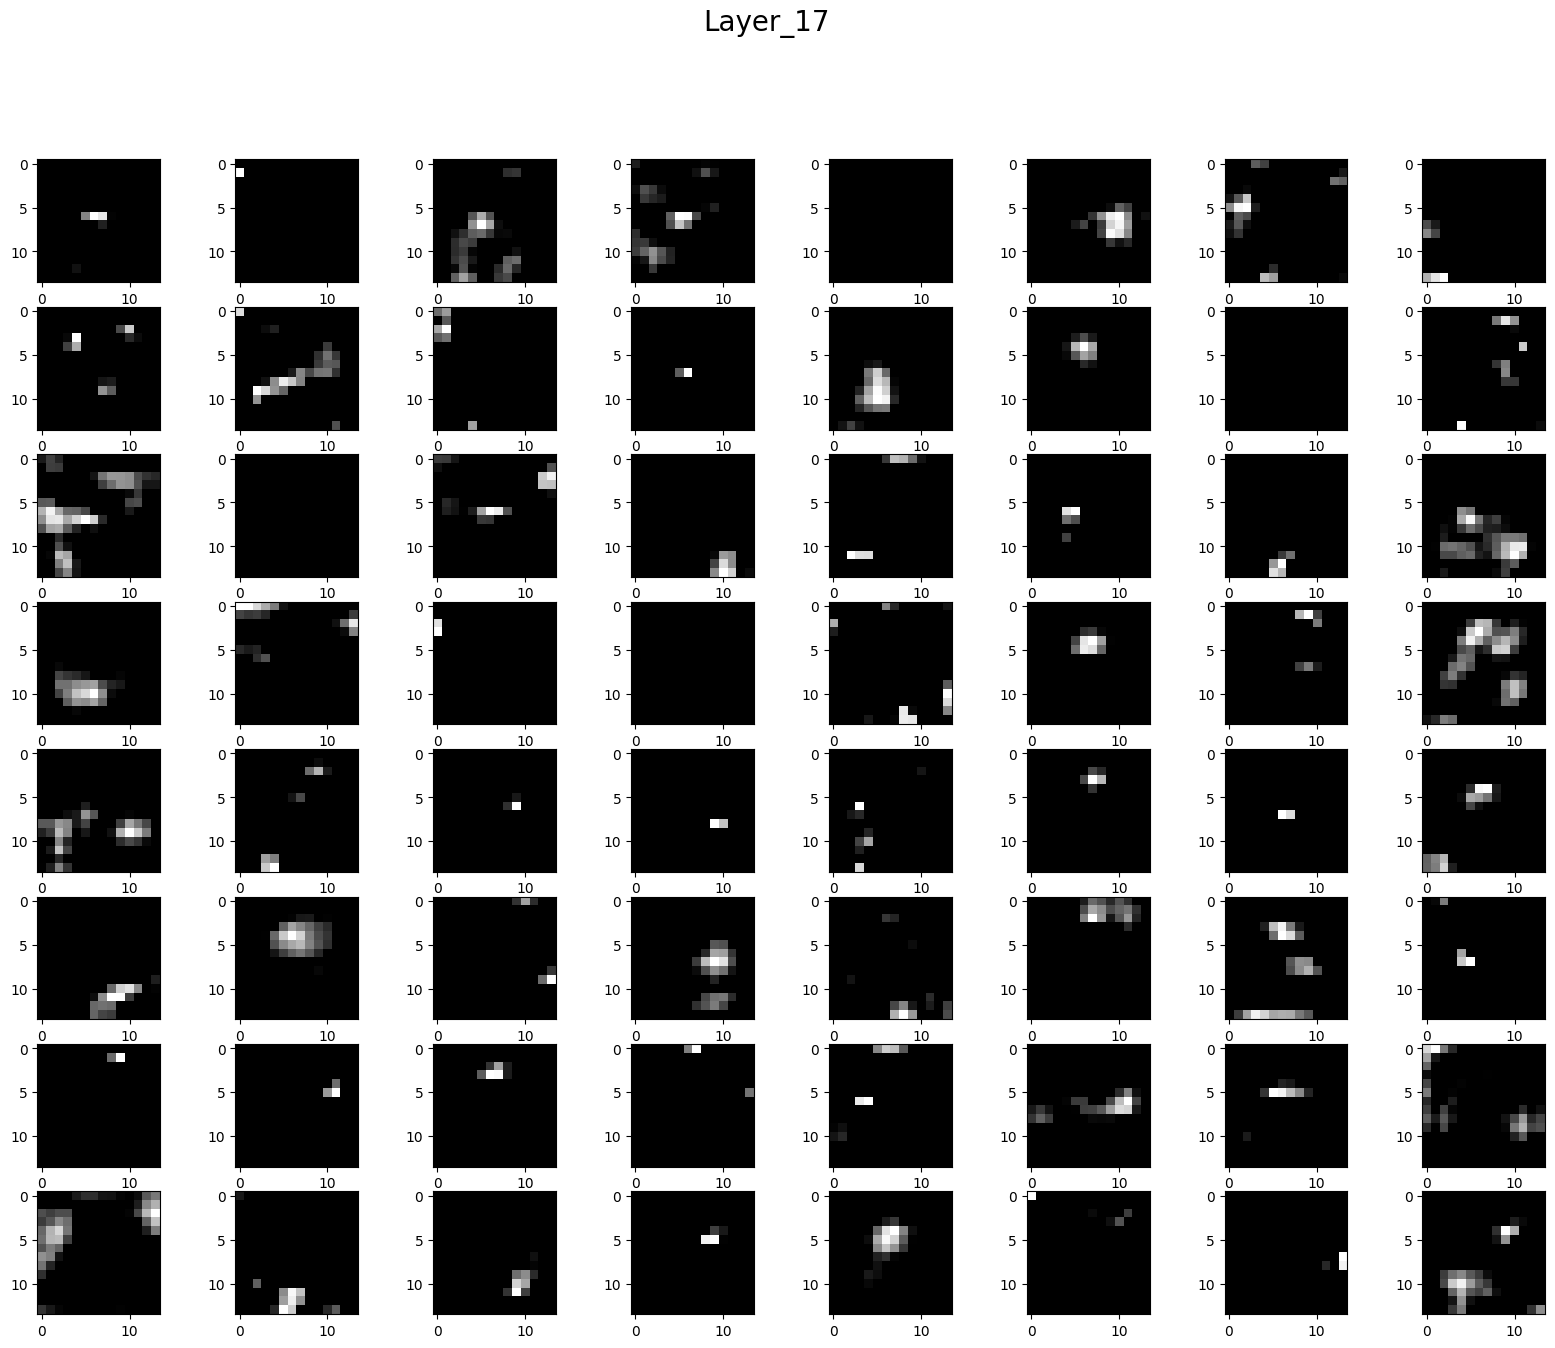

In [57]:
feature_map = model3.predict(img)

for i,fmap in zip(layer_index,feature_map):
    fig = pyplot.figure(figsize=(20,15))
    fig.suptitle("Layer_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        pyplot.subplot(8,8,i)
        pyplot.imshow(fmap[0,:,:,i-1] , cmap='gray')

pyplot.show()


#but this output is not like from sequential layers like one output going to next (I think)
#we are giving cat pic to 5th  7th layer not like 5th layer output going to 7th layer then see result